In [1]:
from pylab import *

%matplotlib inline

In [2]:
rcParams['font.size'] = 14

In [3]:
start = 200
runs = 175
gap = 1
end = start + runs*gap + 1

sim_range = xrange(start, end, gap)
n_bins = 100

temp_points_rdf = (start, sim_range[runs/2], end - 1)

n_time_steps = 10000
dt = 1.0
tot_time = float(n_time_steps * dt)

D = zeros(runs + 1)
temps = zeros(runs + 1)
g = zeros((3, n_bins))
x = zeros(g.shape)

idx = [1, 3]

In [4]:
for i, temp_bath in enumerate(sim_range):
    r_msd = loadtxt("msd_{}.txt".format(temp_bath))[-1, 1]
    temps[i] = loadtxt("tmp_t{}.txt".format(temp_bath))[-1:, 1].mean()
    D[i] = r_msd / (6 * tot_time)
        
sort_idx = argsort(temps)

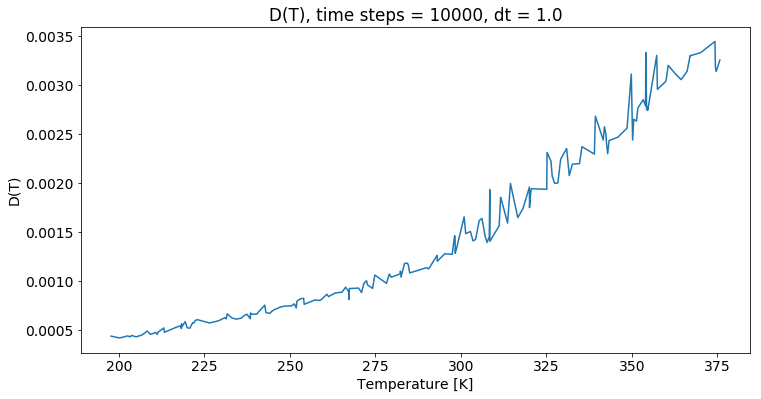

In [5]:
figure(figsize=(12, 6))
title("D(T), time steps = {}, dt = {}".format(n_time_steps, dt))
xlabel("Temperature [K]")
ylabel("D(T)")
plot(temps[sort_idx], D[sort_idx])
show()

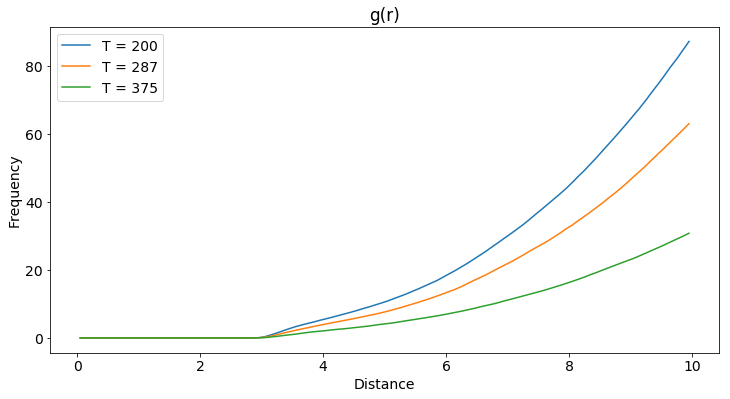

In [6]:
for i, temp_bath in enumerate(temp_points_rdf):
    with open("rdf_{}.txt".format(temp_bath)) as infile:
        lines = infile.read().splitlines()
        last_lines = [[float(numb) for numb in line.split(" ")[1:4:2]] for line in lines[-n_bins:]]
        x[i, :], g[i, :] = array([array(line) for line in last_lines]).T

figure(figsize=(12,6))
for i in range(len(g[:])):
    plot(x[i, :], g[i, :], label="T = {}".format(temp_points_rdf[i]))

legend()
title("g(r)")
xlabel("Distance")
ylabel("Frequency")
show()

In [7]:
g

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e-03, 6.6000e-02,
        3.6200e-01, 9.0600e-01, 1.4800e+00, 2.1220e+00, 2.7360e+00,
        3.3160e+00, 3.8060e+00, 4.2800e+00, 4.7080e+00, 5.2120e+00,
        5.6540e+00, 6.1120e+00, 6.5940e+00, 7.0820e+00, 7.5620e+00,
        8.0800e+00, 8.6340e+00, 9.1580e+00, 9.7220e+00, 1.0286e+01,
        1.0882e+01, 1.1560e+01, 1.2238e+01, 1.2918e+01, 1.3694e+01,
        1.4442e+01, 1.5256e+01, 1.6068e+01, 1.6866e+01, 1.7866e+01,
        1.8854e+01, 1.9836e+01, 2.0900e+01, 2.1990e+01, 2.3148e+01,
        2.4326e+01, 2.5508e+01, 2.6802e+01, 2.8058e+01, 2.9354e+01,
        3.0622e+01, 3.1942e+01, 3.3268e+01, 3.47

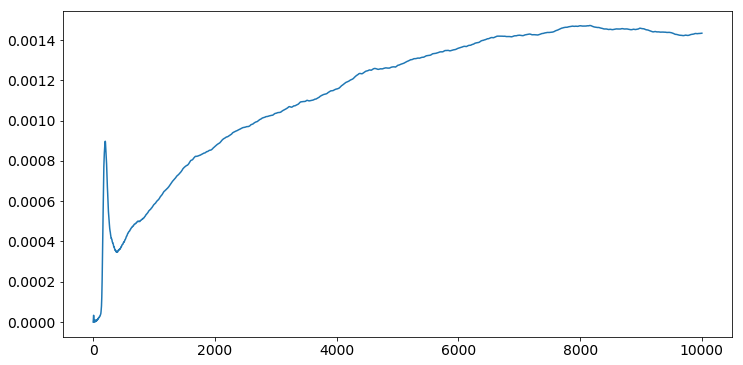

In [8]:
temp_check = 300
time_start = ()

r_msd = loadtxt("msd_{}.txt".format(temp_check))[4::5, 1]
r_msd[1:] += r_msd[0] 

ts = array([dt*i for i in range(n_time_steps+1)])
DT = r_msd[1:] / (6 * ts[1:])

figure(figsize=(12,6))
plot(ts[1:], DT)
show()